In [1]:
#import packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#import datasets 

df= pd.read_csv('transfers.csv')
df_player_valuations = pd.read_csv('player_valuations.csv')
PLpoints2122 = pd.read_csv('PLpoints2122.csv')
PLpoints2223 = pd.read_csv('PLpoints2223.csv')
PLpoints2324 = pd.read_csv('PLpoints2324.csv')
PLpoints2425 = pd.read_csv('PLpoints2425.csv')

df

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
1,1138758,2026-07-01,26/27,336,631,Sporting CP,Chelsea,52140000.0,45000000.0,Geovany Quenda
2,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
3,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
4,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
...,...,...,...,...,...,...,...,...,...,...
79641,35207,1995-07-01,95/96,42281,11896,PTSV Dort. Yth.,Dortmund Yth.,0.0,NaN,Marco Reus
79642,22141,1994-07-01,94/95,59178,29463,Castellammare,Sorrento Youth,NaN,NaN,Antonio Mirante
79643,33829,1994-07-01,94/95,58405,53957,FC Penafiel You,Sporting Yth.,NaN,NaN,José Fonte
79644,40680,1994-07-01,94/95,47320,47318,Lichtenw. Yth.,Schornbach Yth.,0.0,NaN,Sven Ulreich


## Transfer Budget of All Premier League Clubs by Season 21/22 - 24/25

#### Premier League 24/25

In [3]:
# List of 2024/25 Premier League clubs
pl_2425 = [
    "Liverpool", "Arsenal", "Man City", "Chelsea", "Newcastle",
    "Aston Villa", "Nottm Forest", "Brighton", "Bournemouth",
    "Brentford", "Fulham", "Crystal Palace", "Everton", "West Ham",
    "Man Utd", "Wolves", "Tottenham",
    "Leicester", "Ipswich", "Southampton"]

# inbound (money spent)
inbound = df[
    (df['transfer_season'] == '24/25') &
    (df['to_club_name'].isin(pl_2425))].groupby('to_club_name')['transfer_fee'].sum()

# outbound  (money received)
outbound = df[
    (df['transfer_season'] == '24/25') &
    (df['from_club_name'].isin(pl_2425))].groupby('from_club_name')['transfer_fee'].sum()

# net spend = spent - received
net_spend2425 = inbound.subtract(outbound, fill_value=0).sort_values(ascending=False)
net_spend2425


to_club_name
Brighton          197960000.0
Ipswich           151090000.0
Man Utd           149700000.0
Man City          131000000.0
Tottenham         106050000.0
West Ham           99650000.0
Chelsea            77900000.0
Southampton        73260000.0
Brentford          59500000.0
Leicester          53650000.0
Bournemouth        45510000.0
Fulham             40550000.0
Aston Villa        28030000.0
Arsenal            26000000.0
Nottm Forest       24700000.0
Wolves              8900000.0
Liverpool          -5000000.0
Newcastle          -8308000.0
Crystal Palace     -8800000.0
Everton           -34950000.0
Name: transfer_fee, dtype: float64

#### Premier League 23/24

In [4]:
# 2023/24 Premier League clubs
pl_2324 = [
    "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton",
    "Burnley", "Chelsea", "Crystal Palace", "Everton", "Fulham",
    "Liverpool", "Luton", "Man City", "Man Utd", "Newcastle",
    "Nottm Forest", "Sheff Utd", "Tottenham", "West Ham", "Wolves"]

# inbound (money spent)
inbound = df[
    (df['transfer_season'] == '23/24') &
    (df['to_club_name'].isin(pl_2324))].groupby('to_club_name')['transfer_fee'].sum()

# outbound  (money received)
outbound = df[
    (df['transfer_season'] == '23/24') &
    (df['from_club_name'].isin(pl_2324))].groupby('from_club_name')['transfer_fee'].sum()

# net spend = spent - received
net_spend2324 = inbound.subtract(outbound, fill_value=0).sort_values(ascending=False)
net_spend2324

to_club_name
Chelsea           252600000.0
Man City          180100000.0
Arsenal           165250000.0
Liverpool         158000000.0
Tottenham         156000000.0
Man Utd           142560000.0
Bournemouth       127290000.0
Burnley           111050000.0
Newcastle         103900000.0
Aston Villa        73950000.0
Brentford          71600000.0
Crystal Palace     67800000.0
Nottm Forest       65450000.0
Sheff Utd          36050000.0
Luton              25900000.0
Fulham             15870000.0
Wolves            -17300000.0
West Ham          -26400000.0
Everton           -29000000.0
Brighton          -75800000.0
Name: transfer_fee, dtype: float64

#### Premier League 22/23

In [5]:
# 2022/23 Premier League clubs

pl_2223 = [
    "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton",
    "Chelsea", "Crystal Palace", "Everton", "Fulham", "Leeds",
    "Leicester", "Liverpool", "Man City", "Man Utd", "Newcastle",
    "Nottm Forest", "Southampton", "Tottenham", "West Ham", "Wolves"]

# inbound (money spent)
inbound = df[
    (df['transfer_season'] == '22/23') &
    (df['to_club_name'].isin(pl_2223))].groupby('to_club_name')['transfer_fee'].sum()

# outbound  (money received)
outbound = df[
    (df['transfer_season'] == '22/23') &
    (df['from_club_name'].isin(pl_2223))].groupby('from_club_name')['transfer_fee'].sum()

# net spend = spent - received
net_spend2223 = inbound.subtract(outbound, fill_value=0).sort_values(ascending=False)
net_spend2223


to_club_name
Chelsea           515350000.0
Man Utd           216370000.0
Nottm Forest      183850000.0
Newcastle         178850000.0
West Ham          175050000.0
Arsenal           162600000.0
Southampton       147610000.0
Tottenham         133650000.0
Wolves            120407000.0
Liverpool          92600000.0
Bournemouth        82350000.0
Fulham             50700000.0
Brentford          48250000.0
Crystal Palace     46600000.0
Aston Villa        45640000.0
Leeds              44140000.0
Man City           -5170000.0
Everton           -20530000.0
Leicester         -33400000.0
Brighton          -80100000.0
Name: transfer_fee, dtype: float64

#### Premier League 2021/22

In [6]:
# 2021/22 Premier League clubs

pl_2122 = [
    "Arsenal", "Aston Villa", "Brentford", "Brighton", "Burnley",
    "Chelsea", "Crystal Palace", "Everton", "Leeds", "Leicester",
    "Liverpool", "Man City", "Man Utd", "Newcastle", "Norwich",
    "Southampton", "Tottenham", "Watford", "West Ham", "Wolves"
]

# inbound (money spent)
inbound = df[
    (df['transfer_season'] == '21/22') &
    (df['to_club_name'].isin(pl_2122))].groupby('to_club_name')['transfer_fee'].sum()

# outbound  (money received)
outbound = df[
    (df['transfer_season'] == '21/22') &
    (df['from_club_name'].isin(pl_2122))].groupby('from_club_name')['transfer_fee'].sum()

# net spend = spent - received
net_spend2122 = inbound.subtract(outbound, fill_value=0).sort_values(ascending=False)
print(net_spend2122)

to_club_name
Arsenal           138000000.0
Newcastle         130464000.0
Man Utd           125000000.0
Crystal Palace     85620000.0
Liverpool          70450000.0
Leicester          64600000.0
West Ham           63300000.0
Tottenham          53200000.0
Man City           45100000.0
Brentford          37200000.0
Burnley            19400000.0
Watford            18400000.0
Leeds              12800000.0
Everton             6500000.0
Aston Villa         2800000.0
Wolves             -3400000.0
Norwich            -5000000.0
Southampton       -16300000.0
Brighton          -28700000.0
Chelsea           -38440000.0
Name: transfer_fee, dtype: float64


In [8]:
# List of all unique clubs
all_clubs =['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 
 'Chelsea', 'Crystal Palace', 'Everton', 'Liverpool', 
 'Man City', 'Man Utd', 'Newcastle', 'Tottenham', 'West Ham', 'Wolves']

# Filter data for seasons 21/22 to 24/25
df_filtered = df[df['transfer_season'].isin(['21/22', '22/23', '23/24', '24/25'])]

# Inbound (money spent)
inbound_all = (
    df_filtered[df_filtered['to_club_name'].isin(all_clubs)]
    .groupby('to_club_name')['transfer_fee'].sum())

# Outbound (money received)
outbound_all = (
    df_filtered[df_filtered['from_club_name'].isin(all_clubs)]
    .groupby('from_club_name')['transfer_fee'].sum())

# Net spend = spent - received
net_spend_all = inbound_all.subtract(outbound_all, fill_value=0).sort_values(ascending=False).to_frame().reset_index()
net_spend_all = net_spend_all.rename(columns={'to_club_name': 'Club','transfer_fee': 'Net Spend' })
net_spend_all.reset_index().drop('index', axis=1)

,Club,Net Spend
0,Chelsea,807410000.0
1,Man Utd,633630000.0
2,Arsenal,491850000.0
3,Tottenham,448900000.0
4,Newcastle,404906000.0
5,Man City,351030000.0
6,Liverpool,316050000.0
7,West Ham,311600000.0
8,Brentford,216550000.0
9,Crystal Palace,191220000.0


In [9]:
# List of consistent clubs (clubs that did not relegate for 4 seasons)
all_clubs = ['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 
             'Chelsea', 'Crystal Palace', 'Everton', 'Liverpool', 
             'Man City', 'Man Utd', 'Newcastle', 'Tottenham', 
             'West Ham', 'Wolves']

# Replace Man United to ManUtd to Standardize Name format
dfs = [PLpoints2122, PLpoints2223, PLpoints2324, PLpoints2425]
for df in dfs:
    df['Club'] = df['Club'].replace('Man United', 'Man Utd')

# Combine points earned for all seasons
points_all = pd.concat(
    [PLpoints2122, PLpoints2223, PLpoints2324, PLpoints2425],
    ignore_index=True)

# Filter only the consistent clubs
points_filtered = points_all[points_all['Club'].isin(all_clubs)]

# Sum points across all seasons
total_points = points_filtered.groupby('Club', as_index=False)['Points'].sum()
total_points

,Club,Points
0,Arsenal,316
1,Aston Villa,240
2,Brentford,200
3,Brighton,222
4,Chelsea,250
5,Crystal Palace,195
6,Everton,163
7,Liverpool,325
8,Man City,344
9,Man Utd,235


In [25]:
import matplotlib.pyplot as plt

# Merge total points with total net spend
merged_totals = total_points.merge(
    net_spend_all.reset_index(),
    on='Club',
    how='inner')

# Drop Index Column
merged_totals = merged_totals.drop('index', axis=1)


# Add pounds per points 
merged_totals['£ per Point'] = round(merged_totals['Net Spend']/merged_totals['Points'])

merged_totals = merged_totals.sort_values(by="Net Spend", ascending=False).reset_index()
merged_totals.drop('index', axis=1)


,Club,Points,Net Spend,£ per Point
0,Chelsea,250,807410000.0,3229640.0
1,Man Utd,235,633630000.0,2696298.0
2,Arsenal,316,491850000.0,1556487.0
3,Tottenham,235,448900000.0,1910213.0
4,Newcastle,246,404906000.0,1645959.0
5,Man City,344,351030000.0,1020436.0
6,Liverpool,325,316050000.0,972462.0
7,West Ham,191,311600000.0,1631414.0
8,Brentford,200,216550000.0,1082750.0
9,Crystal Palace,195,191220000.0,980615.0


#### Scatter Plot of Points and Pounds

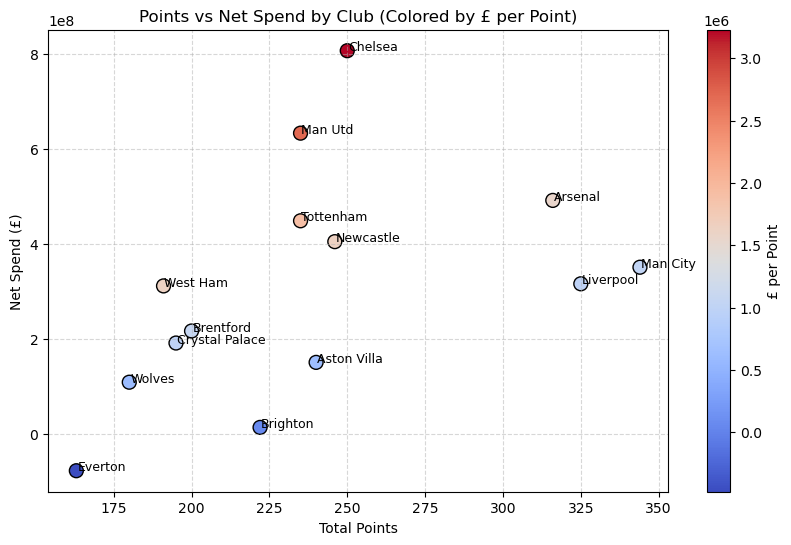

In [11]:
# Scatter plot with color based on £ per point
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_totals['Points'],merged_totals['Net Spend'],c=merged_totals['£ per Point'], cmap='coolwarm', 
    edgecolors='black',
    s=100)

# club labels
for x, row in merged_totals.iterrows():plt.text(row['Points'] + 0.3, row['Net Spend'], row['Club'], fontsize=9)

# Colorbar for £ per point
cbar = plt.colorbar(scatter)
cbar.set_label('£ per Point')

# Titles and labels
plt.title('Points vs Net Spend by Club (Colored by £ per Point)')
plt.xlabel('Total Points')
plt.ylabel('Net Spend (£)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


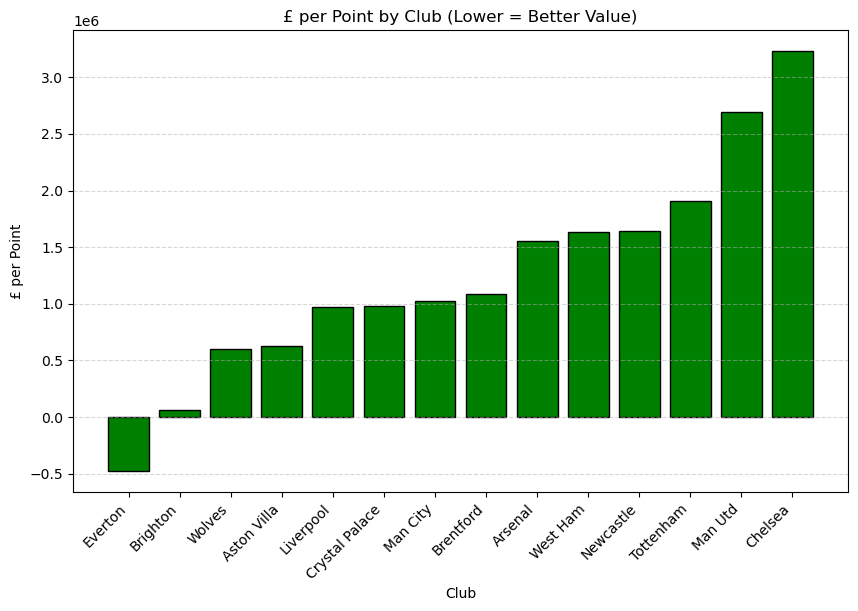

In [12]:
# Sort clubs by £ per point
sorted_df = merged_totals.sort_values('£ per Point')

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_df['Club'], sorted_df['£ per Point'], color='green', edgecolor='black')

# Titles and labels
plt.title('£ per Point by Club (Lower = Better Value)')
plt.xlabel('Club')
plt.ylabel('£ per Point')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()